In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[6, 11, 4, 5, 6]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [7]:
import numpy as np
np.cumsum(s)

2     0.0294
3     0.0895
4     0.1770
5     0.2876
6     0.4233
7     0.5895
8     0.7268
9     0.8355
10    0.9161
11    0.9727
12    1.0000
dtype: float64

<AxesSubplot:>

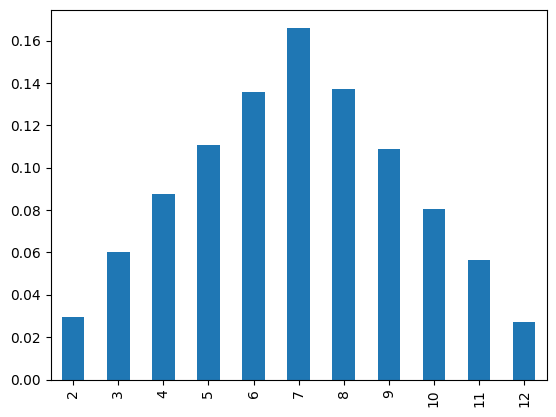

In [8]:
s.plot(kind='bar')

<AxesSubplot:>

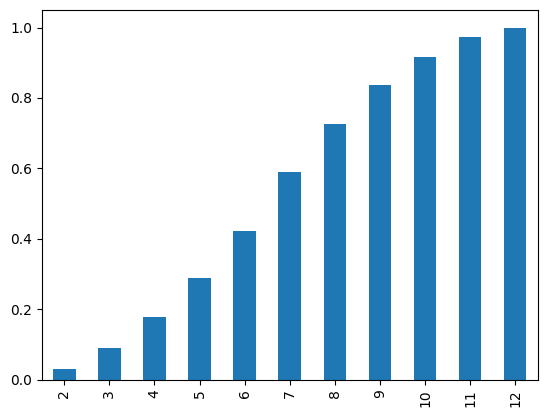

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [11]:
sample.mean()

49.909294197343755

(array([  9.,  41.,  74., 156., 233., 211., 152.,  78.,  37.,   9.]),
 array([35.59703289, 38.47620665, 41.35538041, 44.23455416, 47.11372792,
        49.99290168, 52.87207544, 55.75124919, 58.63042295, 61.50959671,
        64.38877046]),
 <BarContainer object of 10 artists>)

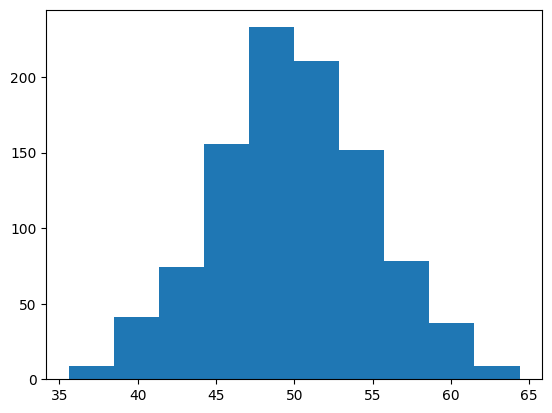

In [12]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [13]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [14]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [15]:
values = np.linspace(sample.min(),sample.max(),100)

In [16]:
sample.max()

64.38877046450499

In [17]:
probabilities = [dist.pdf(value) for value in values]

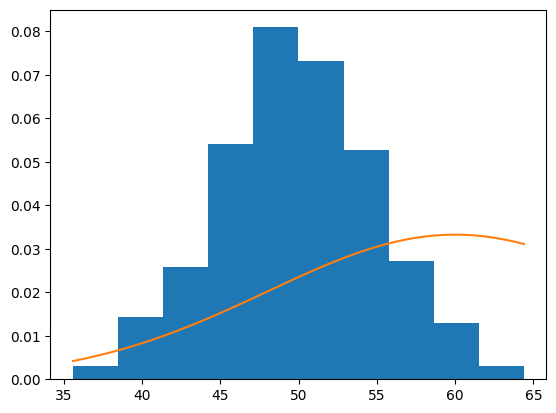

In [18]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

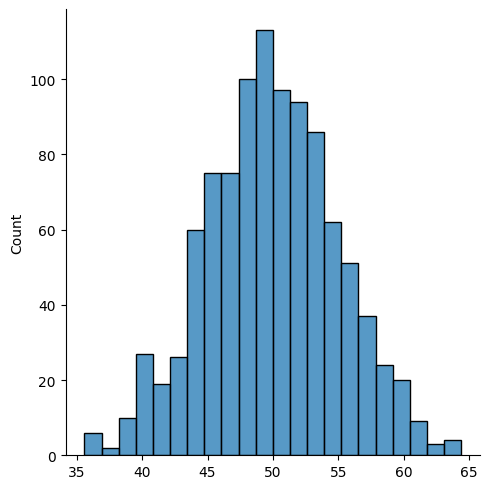

In [20]:
import seaborn as sns
sns.displot(sample)

# KDE

In [21]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [22]:
sample

array([21.25883642, 10.85417181, 22.44270791, 24.91712677, 23.69256099,
       12.67403613, 16.55222766, 23.99196443, 12.00113467, 21.58340738,
       15.73399674, 14.46621232, 16.79702957, 18.10208456, 26.86109233,
       23.29656029, 22.33422158, 23.64363155, 21.2449394 , 13.37385943,
       19.63375918, 23.48308632, 20.37185935, 16.73398465, 14.49030569,
       15.58671245, 15.64532097, 21.55385584, 13.19022856, 14.88594685,
       21.51031208, 15.82411042, 21.79319593, 20.37284694, 10.79323385,
       25.86092744, 19.00724784, 19.65877875, 21.4208944 , 18.23855387,
       15.26802402, 24.3579241 , 15.7110654 , 15.79206076, 28.76362152,
       11.40513243, 13.7134365 , 18.60044951, 23.83270389, 20.93537958,
       19.07810286, 19.79203126, 15.94891837, 27.73785121, 25.73640635,
       22.25142612, 16.43116973, 30.87883047, 24.77063252, 20.39859575,
       25.38021111, 29.34808113, 19.23513388, 24.12855537, 20.51899514,
       27.14603576, 25.25496139, 16.32991713, 23.79710415, 14.66

(array([ 1.,  1.,  1.,  1.,  6.,  6.,  3., 10., 13., 15., 20., 20., 19.,
        22., 22., 26., 20., 16., 25., 14., 10., 12.,  9.,  6., 10., 12.,
        18., 23., 30., 34., 34., 40., 53., 38., 67., 47., 60., 40., 40.,
        40., 27., 26., 30., 14., 10.,  5.,  2.,  1.,  0.,  1.]),
 array([ 6.20879187,  7.17815509,  8.14751831,  9.11688153, 10.08624475,
        11.05560798, 12.0249712 , 12.99433442, 13.96369764, 14.93306086,
        15.90242409, 16.87178731, 17.84115053, 18.81051375, 19.77987697,
        20.7492402 , 21.71860342, 22.68796664, 23.65732986, 24.62669308,
        25.59605631, 26.56541953, 27.53478275, 28.50414597, 29.47350919,
        30.44287241, 31.41223564, 32.38159886, 33.35096208, 34.3203253 ,
        35.28968852, 36.25905175, 37.22841497, 38.19777819, 39.16714141,
        40.13650463, 41.10586786, 42.07523108, 43.0445943 , 44.01395752,
        44.98332074, 45.95268397, 46.92204719, 47.89141041, 48.86077363,
        49.83013685, 50.79950007, 51.7688633 , 52.73822652,

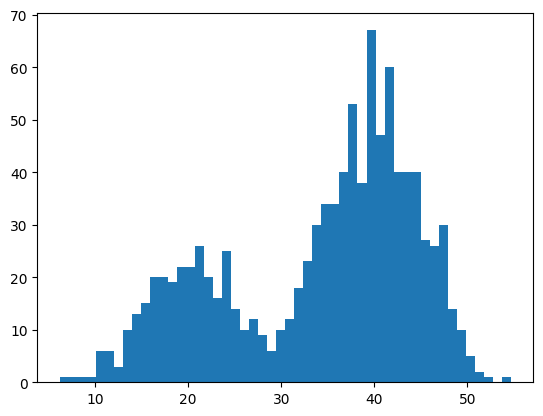

In [23]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [32]:
pip install -U scikit-learn

     ---------------------------------------- 8.3/8.3 MB 4.5 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [34]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [35]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

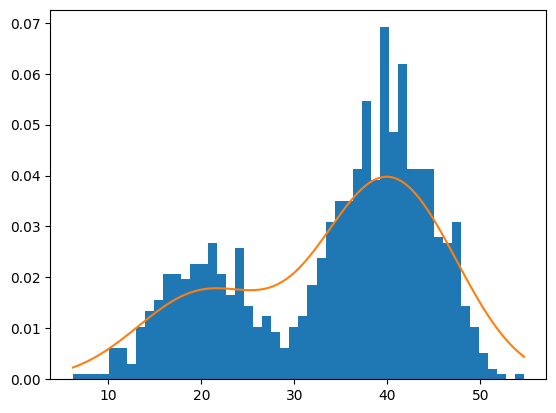

In [36]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<AxesSubplot:ylabel='Density'>

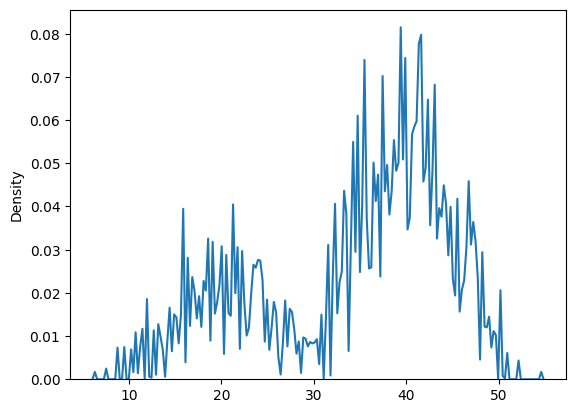

In [37]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [38]:
import seaborn as sns

In [39]:
df = sns.load_dataset('iris')

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

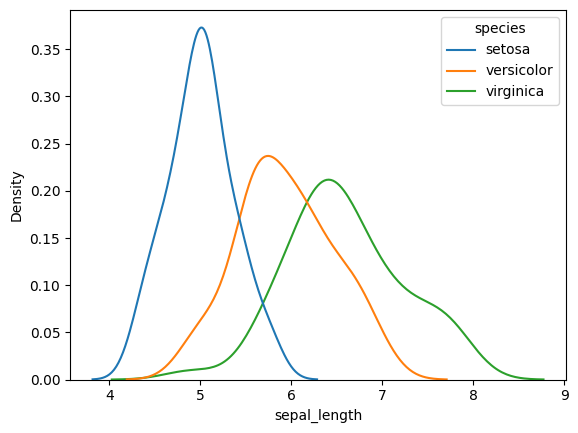

In [41]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

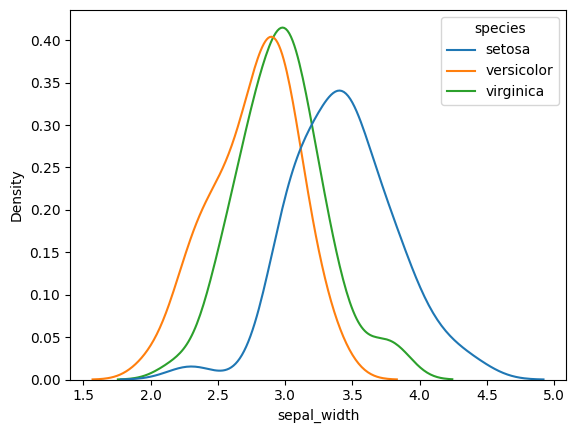

In [42]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

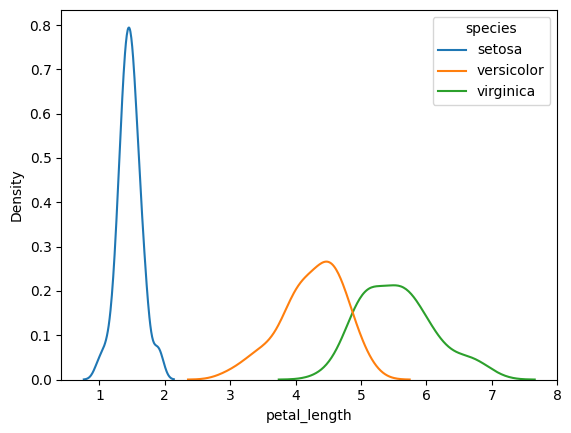

In [43]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

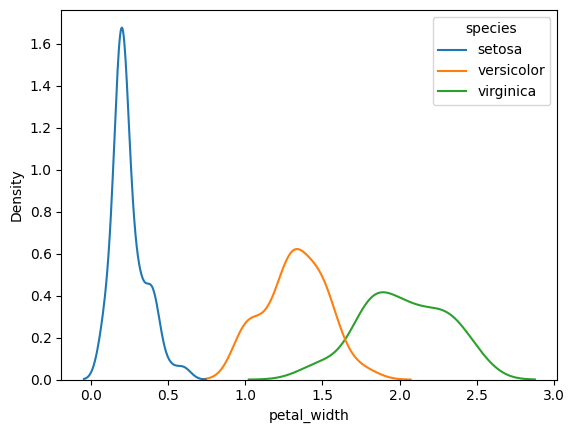

In [44]:
sns.kdeplot(data=df,x='petal_width',hue='species')

In [45]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [46]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [47]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Density'>

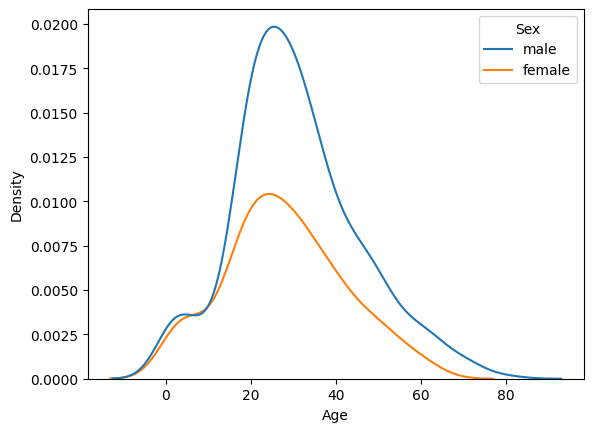

In [48]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

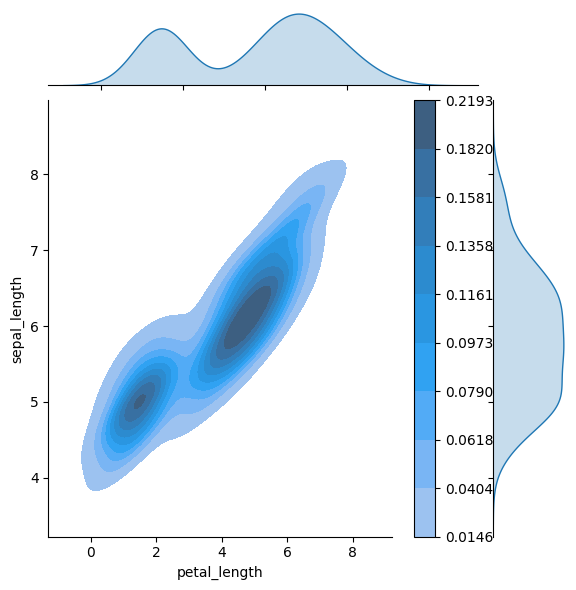

In [49]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

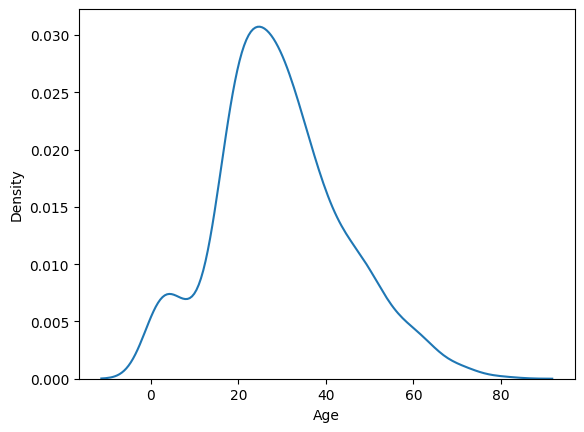

In [50]:
sns.kdeplot(titanic['Age'])

In [51]:
titanic['Age'].mean()

29.69911764705882

In [52]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<AxesSubplot:xlabel='Age', ylabel='Density'>

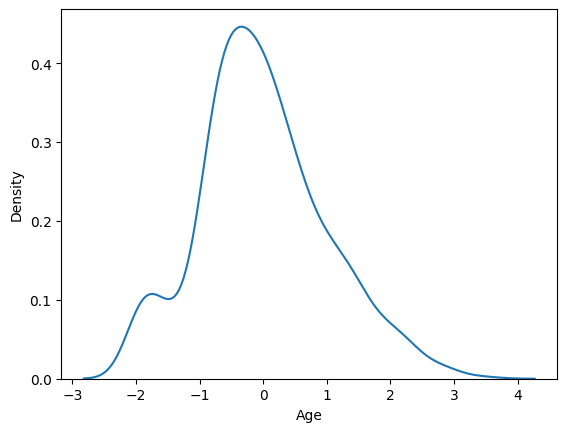

In [53]:
sns.kdeplot(x)

In [54]:
x.mean()

2.338621049070358e-16

In [55]:
x.std()

1.0

In [56]:
titanic['Age'].skew()

0.38910778230082704

In [57]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [58]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [59]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [60]:
titanic['Age'].max()

80.0